<img src="logo.png" width="350" height="350" align="center"/>

### Tools

___

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import folium as fl
from geopy.geocoders import Nominatim as geo
from sklearn.cluster import KMeans

### Datasets

All data used in this work is from public sources and its extraction, transformation and storage process is documented in this notebook in my Github.
___

This dataset has information about the cities of the state of Sao Paulo. Originally, the state has 645 cities. Due to the lack of some relevant information, some were removed, leaving 633 cities. 

In [277]:
def conv_ll(l):
    l = l.replace('.', '')
    l = l[:3] + '.' + l[3:9]
    l = float(l)
    return(l)

In [278]:
df_sp = pd.read_csv('dataset_sp.csv', sep = ';', index_col = 'City')
df_sp['Latitude'] = df_sp['Latitude'].apply(conv_ll)
df_sp['Longitude'] = df_sp['Longitude'].apply(conv_ll)
df_sp.head(10)

,Population,Area KM2,Farming,Industry,Public administration,Public services,Taxes,GDP,GDP per capita,HDI-M,HDI-R,HDI-L,HDI-E,FMDI,Latitude,Longitude
City,,,,,,,,,,,,,,,,
Adamantina,33888,411.99,45201.02,138803.34,168908.81,621261.40,80366.51,1054541.08,31121.18,0.79,0.77,0.85,0.75,0.78,-21.686651,-51.076297
Adolfo,3469,211.06,33549.77,8059.45,21422.16,33338.63,3364.63,99734.63,28667.61,0.73,0.71,0.84,0.65,0.78,-21.235659,-49.644191
Aguaí,34919,474.55,87873.19,297084.21,121789.13,336929.46,99032.53,942708.52,27263.25,0.72,0.70,0.86,0.61,0.72,-22.059203,-46.979384
Agudos,35828,966.71,80476.44,800703.35,174721.09,672594.73,334526.09,2063021.70,57826.60,0.74,0.70,0.84,0.69,0.77,-22.471162,-48.987822
Alambari,5600,159.60,35578.26,7684.43,24265.69,28925.07,4113.25,100566.70,18245.05,0.71,0.68,0.80,0.66,0.70,-23.550338,-47.897971
Alfredo Marcondes,3923,118.92,5147.29,16134.31,19518.70,28834.32,13365.29,82999.90,21173.45,0.74,0.68,0.84,0.71,0.76,-21.952700,-51.413956
Altair,3994,313.01,137866.81,9244.01,20293.65,37987.09,4689.41,210080.96,52877.16,0.69,0.70,0.80,0.58,0.75,-20.523895,-49.060613
Altinópolis,15557,928.96,195155.50,22009.42,64684.57,221688.64,23401.18,526939.31,33869.35,0.73,0.73,0.84,0.64,0.80,-21.021364,-47.371200
Alto Alegre,4037,318.57,36909.22,12081.21,22009.11,32604.84,6853.25,110457.64,27293.71,0.70,0.68,0.82,0.62,0.75,-21.611707,-50.150075


São Paulo table comprehension:

* **City:** city of Sao Paulo state
* **Population:** number of inhabitants (2018) 
* **Area KM2:** city area in Km2
* **Farming:** total value of production from agricultural activities (2017)
* **Industry:** total value of production from industrial activities (2017)
* **Public administration:** total value of production from public administration (2017)
* **Public services:** total value of production from public services (2017)
* **Taxes:** total value of production from taxes (2017)
* **GDP:** total value of production from gross domestic product (2017)
* **GDP per capta:** ratio between GDP and Population (2017)
* **HDI-M:** mean index over HDI-R, HDI-L and HDI-E (2010)
* **HDI-R:** human development index - income (2010)
* **HDI-L:** human development index - longevity (2010)
* **HDI-E:** human development index - education (2010)
* **FMDI:** municipal development index (2013)
* **Latitude:** latitude coordinates
* **Longitude:** longitude coordinates

In [279]:
df_sp.describe().round(decimals=2)

,Population,Area KM2,Farming,Industry,Public administration,Public services,Taxes,GDP,GDP per capita,HDI-M,HDI-R,HDI-L,HDI-E,FMDI,Latitude,Longitude
count,633.00,633.00,633.00,633.00,633.00,6.330000e+02,6.330000e+02,6.330000e+02,633.00,633.00,633.00,633.00,633.00,633.00,633.00,633.00
mean,69272.99,385.96,56807.39,593318.06,272422.28,1.881461e+06,5.228281e+05,3.326837e+06,33371.74,0.74,0.72,0.84,0.68,0.76,-22.14,-48.63
std,479742.88,320.37,65832.88,2762611.36,1760898.45,1.922045e+07,5.014366e+06,2.849975e+07,28005.27,0.03,0.04,0.02,0.05,0.06,1.18,1.73
min,810.00,3.61,0.00,1197.71,7998.20,7.340020e+03,5.862400e+02,2.786437e+04,8711.80,0.64,0.59,0.78,0.52,0.59,-25.01,-53.06
25%,5567.00,159.60,17948.44,9686.14,25063.31,4.205689e+04,5.708110e+03,1.273613e+05,19730.86,0.72,0.69,0.82,0.64,0.72,-23.08,-50.00
50%,13654.00,283.14,36620.69,53813.77,55295.69,1.345454e+05,2.291148e+04,3.442632e+05,26537.35,0.74,0.72,0.84,0.68,0.77,-22.19,-48.60
75%,41262.00,512.58,72377.53,310085.12,165449.08,5.997348e+05,1.208201e+05,1.323520e+06,37374.78,0.76,0.74,0.85,0.71,0.81,-21.18,-47.29
max,11753659.00,1978.80,580210.27,59119808.83,42958613.89,4.746460e+08,1.225262e+08,6.992884e+08,357342.06,0.86,0.89,0.89,0.82,0.90,-19.94,-44.32


In [280]:
df_fs.shape

(11760, 6)

The table below contains information about locations around cities. The FourSquare API has some restrictions due to my "personal" account: each search is limited to 100 locations within a radius of up to 5 km. To avoid territorial overlap, the search was performed within 1 km, as there are cities with just under 4 km2 in area.

In [281]:
df_fs = pd.read_csv('dataset_fs.csv', sep = ';', index_col = 'City')
df_fs['Venue Latitude'] = df_fs['Venue Latitude'].apply(conv_ll)
df_fs['Venue Longitude'] = df_fs['Venue Longitude'].apply(conv_ll)
df_fs.head(10)

,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category,Accessible
City,,,,,,
Adamantina,Verdurão,4ef606028b81ef98cf8bf3d5,-21.685683,-51.079293,Gastropub,No
Adamantina,Aroma Café & Cia,4b95623bf964a520b99f34e3,-21.685990,-51.073928,Café,No
Adamantina,Restaurante e Pizzaria Cartola,4b817ebef964a5202caa30e3,-21.688155,-51.074865,Restaurant,No
Adamantina,Via Sabor Panificadora,4de7ed7b45dda9e8a3385432,-21.682576,-51.079105,Bakery,No
Adamantina,Chiquinho Sorvetes Adamantina,5291672511d2ec25cc40d5e3,-21.687580,-51.074467,Ice Cream Shop,No
Adamantina,Bar do Sashimi,4ba40a38f964a520a97a38e3,-21.688654,-51.079062,Bar,No
Adamantina,Sorveteria Cherry,4b9cc3a2f964a520707a36e3,-21.688062,-51.073470,Ice Cream Shop,No
Adamantina,La Olimareña,5494af82498e89679c1197cb,-21.691706,-51.074619,Ice Cream Shop,No
Adamantina,Sorveteria Água Na Boca,4efa1705b63446a50b0c1bab,-21.683935,-51.074804,Ice Cream Shop,No


FourSquare table comprehension:

* **City:** city of Sao Paulo state
* **Venue:** venue name
* **Venue ID:** venue ID on FourSquare
* **Venue Latitude:** venue latitude coordinate
* **Venue Longitude:** venue longitude coordinate
* **Venue Category:** venue category
* **Accessible:** is venue accessible for wheelchair? Yes or No

### Data Analysis

___

In [282]:
df_hot = pd.get_dummies(df_fs['Accessible'])[['Yes']]
df_sp['Venues'] = df_fs.groupby('City').apply(len)
df_sp['Accessibility'] = df_hot.groupby('City').apply(np.mean)
df_sp.replace(np.nan, 0, inplace = True)

In [283]:
df_sp.head(10)

,Population,Area KM2,Farming,Industry,Public administration,Public services,Taxes,GDP,GDP per capita,HDI-M,HDI-R,HDI-L,HDI-E,FMDI,Latitude,Longitude,Venues,Accessibility
City,,,,,,,,,,,,,,,,,,
Adamantina,33888,411.99,45201.02,138803.34,168908.81,621261.40,80366.51,1054541.08,31121.18,0.79,0.77,0.85,0.75,0.78,-21.686651,-51.076297,44.0,0.022727
Adolfo,3469,211.06,33549.77,8059.45,21422.16,33338.63,3364.63,99734.63,28667.61,0.73,0.71,0.84,0.65,0.78,-21.235659,-49.644191,5.0,0.000000
Aguaí,34919,474.55,87873.19,297084.21,121789.13,336929.46,99032.53,942708.52,27263.25,0.72,0.70,0.86,0.61,0.72,-22.059203,-46.979384,23.0,0.000000
Agudos,35828,966.71,80476.44,800703.35,174721.09,672594.73,334526.09,2063021.70,57826.60,0.74,0.70,0.84,0.69,0.77,-22.471162,-48.987822,20.0,0.100000
Alambari,5600,159.60,35578.26,7684.43,24265.69,28925.07,4113.25,100566.70,18245.05,0.71,0.68,0.80,0.66,0.70,-23.550338,-47.897971,3.0,0.000000
Alfredo Marcondes,3923,118.92,5147.29,16134.31,19518.70,28834.32,13365.29,82999.90,21173.45,0.74,0.68,0.84,0.71,0.76,-21.952700,-51.413956,5.0,0.000000
Altair,3994,313.01,137866.81,9244.01,20293.65,37987.09,4689.41,210080.96,52877.16,0.69,0.70,0.80,0.58,0.75,-20.523895,-49.060613,1.0,0.000000
Altinópolis,15557,928.96,195155.50,22009.42,64684.57,221688.64,23401.18,526939.31,33869.35,0.73,0.73,0.84,0.64,0.80,-21.021364,-47.371200,4.0,0.000000
Alto Alegre,4037,318.57,36909.22,12081.21,22009.11,32604.84,6853.25,110457.64,27293.71,0.70,0.68,0.82,0.62,0.75,-21.611707,-50.150075,0.0,0.000000


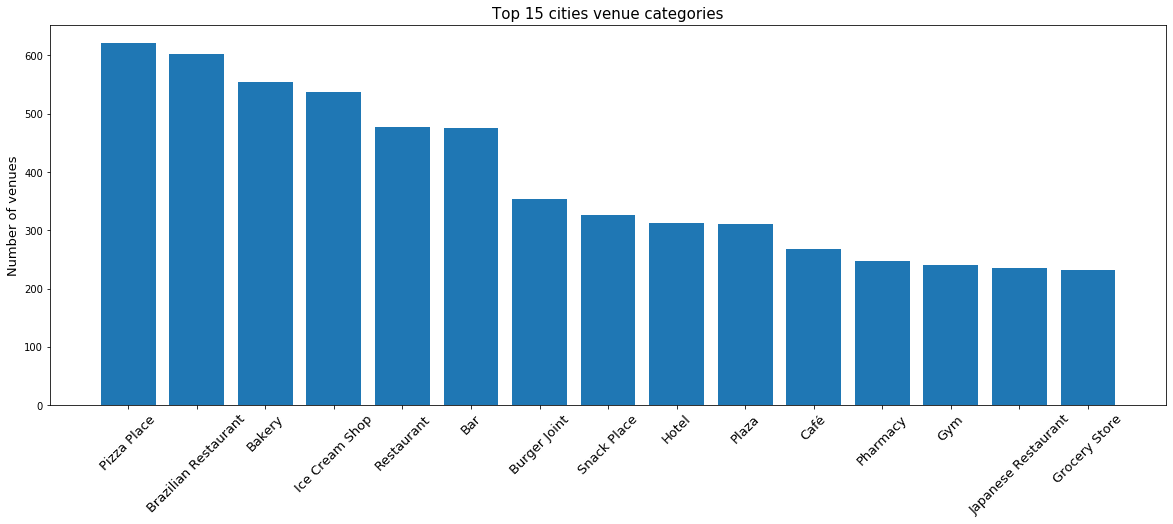

In [284]:
plt.figure(figsize = (20,7))
dft = df_fs['Venue Category'].value_counts().to_frame().head(15)
plt.bar(dft.index, dft['Venue Category'])
plt.title('Top 15 cities venue categories', fontsize=15)
plt.ylabel('Number of venues', fontsize = 13)
plt.xticks(rotation = 45, fontsize=13)
plt.show()

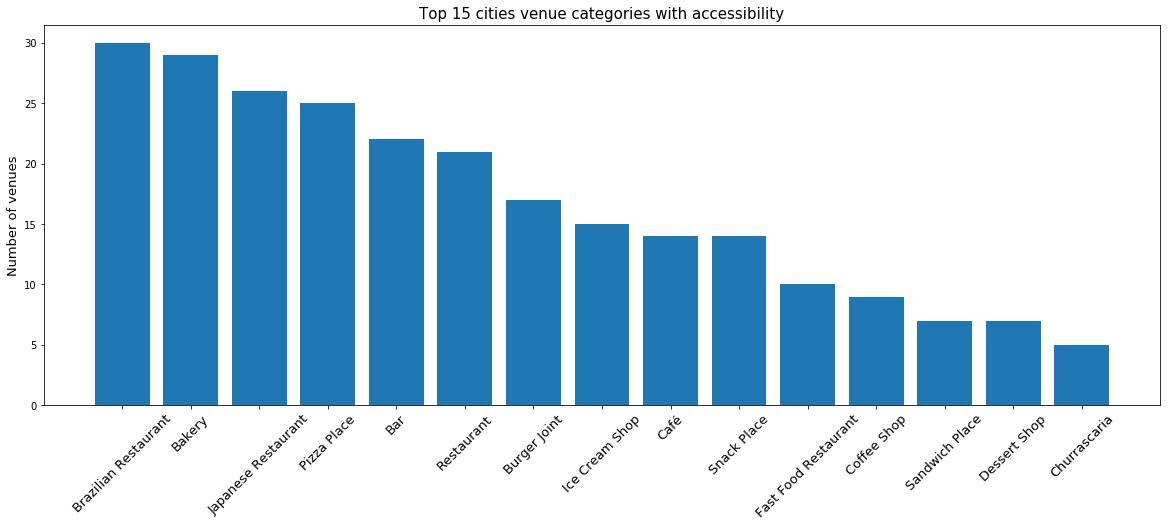

In [285]:
plt.figure(figsize = (20,7))
dft = df_fs[df_fs['Accessible'] == 'Yes']['Venue Category'].value_counts().to_frame().head(15)
plt.bar(dft.index, dft['Venue Category'])
plt.title('Top 15 cities venue categories with accessibility', fontsize=15)
plt.ylabel('Number of venues', fontsize = 13)
plt.xticks(rotation = 45, fontsize=13)
plt.show()

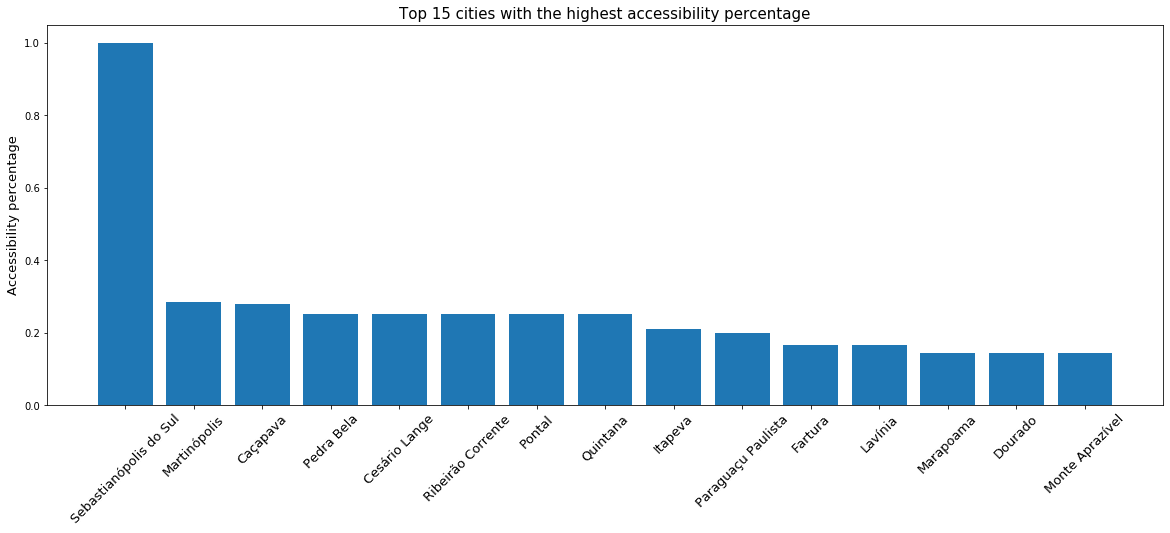

In [286]:
dfa = df_sp[df_sp['Accessibility'] > 0]
dfa = dfa.sort_values('Accessibility', ascending=False).head(15)
plt.figure(figsize = (20,7))
plt.bar(dfa.index, dfa['Accessibility'])
plt.title('Top 15 cities with the highest accessibility percentage', fontsize=15)
plt.ylabel('Accessibility percentage', fontsize=13)
plt.xticks(rotation = 45, fontsize=13)
plt.show()

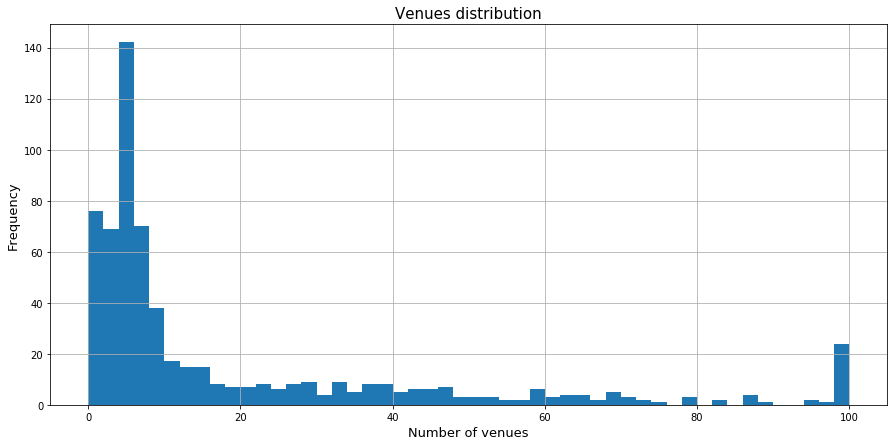

In [287]:
plt.figure(figsize = (15,7))
df_sp['Venues'].hist(bins=50)
plt.title('Venues distribution', fontsize=15)
plt.ylabel('Frequency', fontsize=13)
plt.xlabel('Number of venues', fontsize=13)
plt.show()

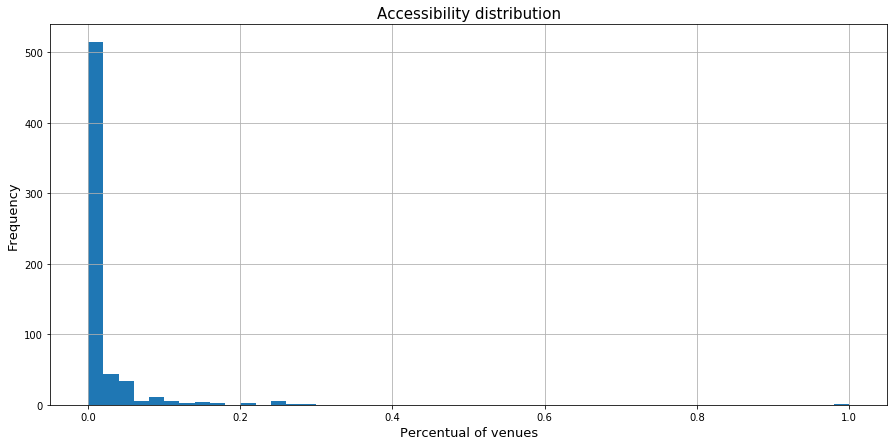

In [288]:
plt.figure(figsize = (15,7))
df_sp['Accessibility'].hist(bins=50)
plt.title('Accessibility distribution', fontsize=15)
plt.ylabel('Frequency', fontsize=13)
plt.xlabel('Percentual of venues', fontsize=13)
plt.show()

[]

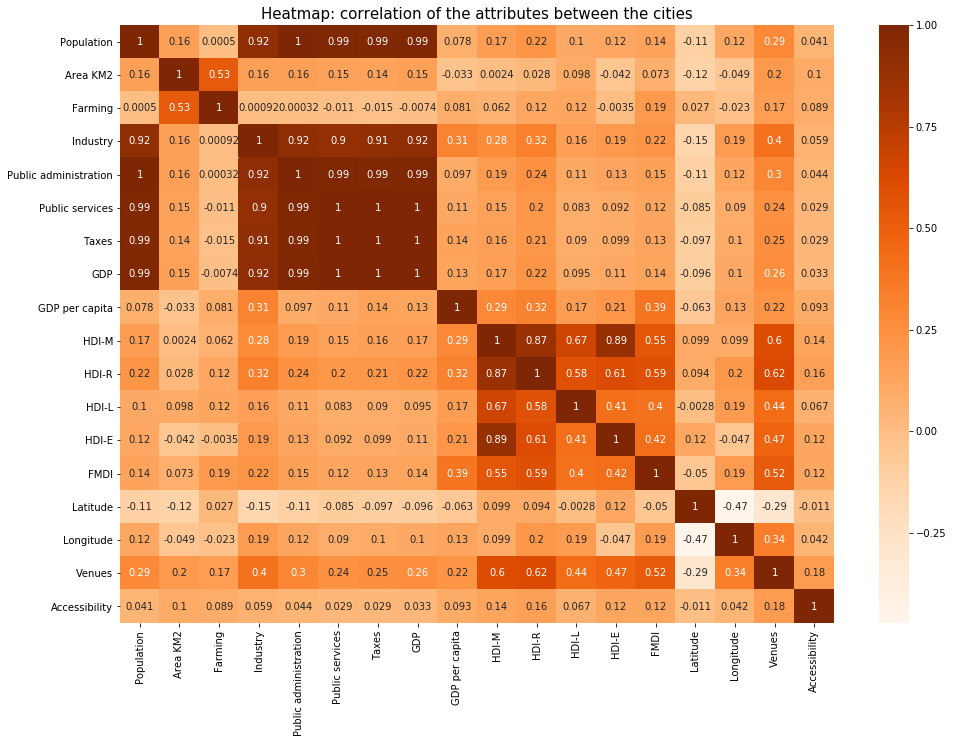

In [289]:
plt.figure(figsize = (16,11))
sb.heatmap(df_sp.corr(), annot=True, cmap = 'Oranges')
plt.title('Heatmap: correlation of the attributes between the cities', fontsize = 15)
plt.plot()

[]

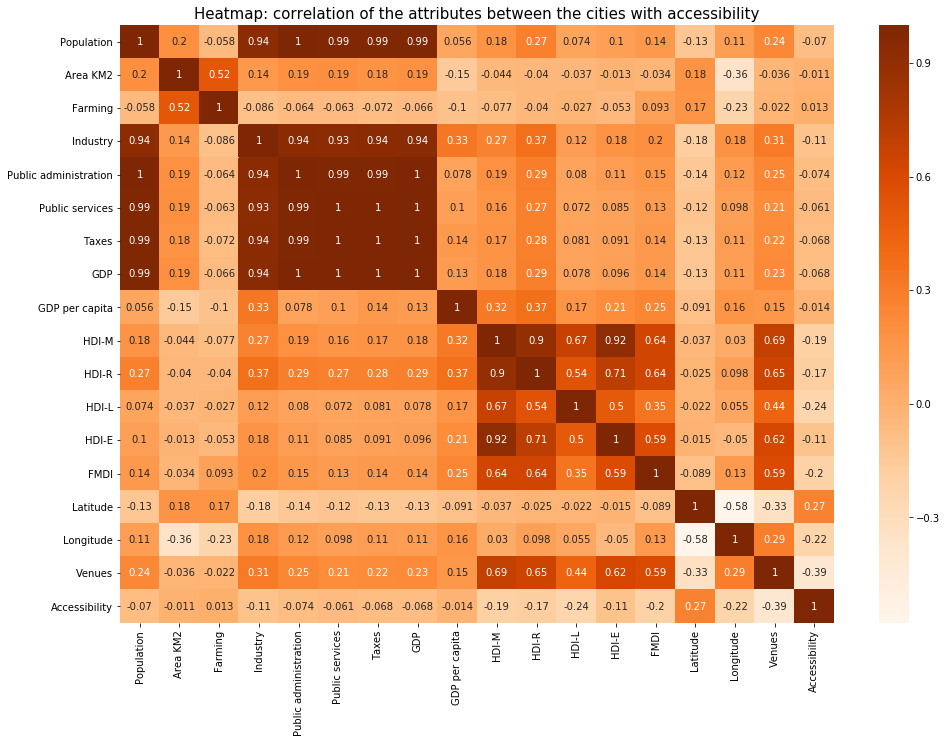

In [290]:
plt.figure(figsize = (16,11))
sb.heatmap(df_sp[df_sp['Accessibility'] > 0].corr(), annot=True, cmap = 'Oranges')
plt.title('Heatmap: correlation of the attributes between the cities with accessibility', fontsize = 15)
plt.plot()

In [291]:
df_sp.drop(['GDP per capita', 'HDI-M', 'Venues'], axis = 1, inplace = True)

In [292]:
kclusters = 5
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_sp)

In [293]:
df_sp['Group'] = kmeans.labels_

In [294]:
df_g0 = df_sp[df_sp['Group'] == 0]
df_g1 = df_sp[df_sp['Group'] == 1]
df_g2 = df_sp[df_sp['Group'] == 2]
df_g3 = df_sp[df_sp['Group'] == 3]
df_g4 = df_sp[df_sp['Group'] == 4]

In [295]:
df_comp = pd.DataFrame(columns=list(df_sp.columns)[:-1])
df_comp

,Population,Area KM2,Farming,Industry,Public administration,Public services,Taxes,GDP,HDI-R,HDI-L,HDI-E,FMDI,Latitude,Longitude,Accessibility


In [296]:
df_comp.loc[0] = df_g0.describe().loc['mean'].to_list()[:-1]
df_comp.loc[1] = df_g1.describe().loc['mean'].to_list()[:-1]
df_comp.loc[2] = df_g2.describe().loc['mean'].to_list()[:-1]
df_comp.loc[3] = df_g3.describe().loc['mean'].to_list()[:-1]
df_comp.loc[4] = df_g4.describe().loc['mean'].to_list()[:-1]
df_comp.index.name = 'Group'

In [297]:
df_comp.sort_values('Accessibility', ascending=False)

,Population,Area KM2,Farming,Industry,Public administration,Public services,Taxes,GDP,HDI-R,HDI-L,HDI-E,FMDI,Latitude,Longitude,Accessibility
Group,,,,,,,,,,,,,,,
2,5.720751e+05,479.430000,45191.221429,9.921091e+06,2.329664e+06,1.860665e+07,5.629350e+06,3.653195e+07,0.810000,0.855714,0.754286,0.847143,-23.025386,-46.896097,0.041429
3,2.533366e+05,442.492105,54581.175789,2.804005e+06,1.014292e+06,5.892823e+06,1.828582e+06,1.159428e+07,0.766053,0.851579,0.729474,0.832368,-22.964559,-47.264531,0.035283
1,1.175366e+07,1521.110000,37648.700000,5.911981e+07,4.295861e+07,4.746460e+08,1.225262e+08,6.992884e+08,0.840000,0.860000,0.720000,0.850000,-23.550650,-46.633382,0.030000
4,8.555592e+05,310.975000,34544.632500,7.001294e+06,3.541547e+06,3.728857e+07,1.219937e+07,6.006532e+07,0.787500,0.850000,0.720000,0.847500,-23.348081,-46.813357,0.022424
0,2.580204e+04,379.716346,57277.582281,1.928739e+05,1.037183e+05,3.653354e+05,8.702385e+04,8.062291e+05,0.711767,0.834460,0.671955,0.756072,-22.065719,-48.751255,0.013258


In [298]:
df_g2.sort_values('Accessibility', ascending=False)

,Population,Area KM2,Farming,Industry,Public administration,Public services,Taxes,GDP,HDI-R,HDI-L,HDI-E,FMDI,Latitude,Longitude,Accessibility,Group
City,,,,,,,,,,,,,,,,
Sorocaba,644397,450.38,33773.57,7980161.19,2565990.08,15269981.38,6002952.21,31852858.43,0.79,0.84,0.76,0.85,-23.501667,-47.458056,0.11,2
Santo André,690551,175.78,843.52,5196161.76,2469773.28,16248943.03,3554958.82,27470680.40,0.82,0.86,0.77,0.87,-23.657339,-46.532250,0.06,2
Jundiaí,400549,431.21,112983.03,8240604.97,1915874.44,23137051.65,7821438.84,41227952.95,0.83,0.87,0.77,0.89,-23.188786,-46.884512,0.04,2
São Bernardo do Campo,803771,409.53,7202.98,9186786.28,3008065.43,24370060.27,8108274.41,44680389.37,0.81,0.86,0.75,0.84,-23.708034,-46.550674,0.04,2
Paulínia,100915,138.78,26024.70,17671369.71,976756.40,11451592.82,5220746.25,35346489.87,0.80,0.86,0.73,0.80,-22.763039,-47.153221,0.02,2
Ribeirão Preto,669180,650.92,119098.04,5305064.63,2781989.58,23253567.10,3856123.83,35315843.18,0.82,0.84,0.74,0.87,-21.178333,-47.806667,0.02,2
São José dos Campos,695163,1099.41,16412.71,15867490.19,2589198.54,16515347.97,4840954.50,39829403.91,0.80,0.86,0.76,0.81,-23.180501,-45.887296,0.00,2


In [301]:
# Centering the coordinates of the state of São Paulo

sp = 'São Paulo, BR'

geolocator = geo(user_agent="sp_explorer")
location = geolocator.geocode(sp)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of of the state of São Paulo are %f, %f.' % (latitude, longitude))

The geographical coordinates of of the state of São Paulo are -23.550651, -46.633382.


In [303]:
# Map for visual inspection

map_sp = fl.Map(location=[latitude, longitude], zoom_start=6.5)

for lat, lng, city in zip(df_g0['Latitude'], df_g0['Longitude'], df_g0.index.values):
    label = '{}'.format(city)
    label = fl.Popup(label, parse_html=True)
    fl.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='white',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sp)
    
for lat, lng, city in zip(df_g1['Latitude'], df_g1['Longitude'], df_g1.index.values):
    label = '{}'.format(city)
    label = fl.Popup(label, parse_html=True)
    fl.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='white',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sp)
    
for lat, lng, city in zip(df_g2['Latitude'], df_g2['Longitude'], df_g2.index.values):
    label = '{}'.format(city)
    label = fl.Popup(label, parse_html=True)
    fl.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='white',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sp)
    
for lat, lng, city in zip(df_g3['Latitude'], df_g3['Longitude'], df_g3.index.values):
    label = '{}'.format(city)
    label = fl.Popup(label, parse_html=True)
    fl.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='white',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sp)
    
for lat, lng, city in zip(df_g4['Latitude'], df_g4['Longitude'], df_g4.index.values):
    label = '{}'.format(city)
    label = fl.Popup(label, parse_html=True)
    fl.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='white',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sp)
    
map_sp